## Eigen Face Demo

In this document, we will extract PCA components using a face dataset and use the resulting eigenvectors to reconstruct and compare images. Sample image files are provided in the directory (**eigenface_test.png**, **person1_1.png**, **person1_2.png**, **person2_1.png**), but feel free to use your own samples in this document.

In [14]:
import numpy as np
from numpy.random import RandomState
import cv2

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces


In [15]:
# Prepare dataset
rng = RandomState(0)
faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=rng)
print(f'Image number: {faces.shape[0]}')
print(f'Images are flatten to dim: {faces.shape[1]}')
print(f'Each image is formatted into {np.min(faces)}~{np.max(faces)}')

Image number: 400
Images are flatten to dim: 4096
Each image is formatted into 0.0~1.0


In [16]:
def get_grid_image(images, n_row, n_col):
    '''
    Show images as grid-view.
    
    Parameters:
    - images: 2D image features NXheightXwidth and color is normalized into 0~1.
    
    Returns:
    - grid image color 0~255
    '''
    # TODO: make grid image
    height, width = images.shape[1], images.shape[2]
    grid_image = np.zeros((n_row * height, n_col * width), dtype=np.float32)
    for i in range(n_row):
        for j in range(n_col):
            grid_image[i * height:(i + 1) * height, j * width:(j + 1) * width] = images[i * n_col + j]
    grid_image = (grid_image * 255).astype(np.uint8) # mulitply by 255 to convert to 0-255

    return grid_image
    


## Step 0: Visualize Faces

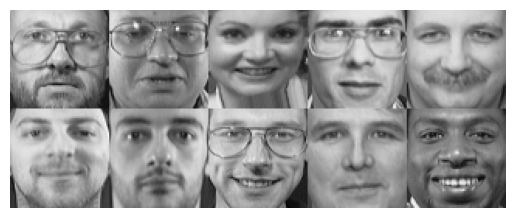

In [17]:
grid_image = get_grid_image(faces[:10].reshape(-1,64,64), 2, 5)

plt.imshow(grid_image, cmap='gray')
plt.axis('off')
plt.show()

## Step 1: Preprocess Data

In [18]:
faces_centered_1 = faces - faces.mean(axis=0)
faces_centered_2 = faces - faces.mean(axis=1).reshape(faces.shape[0],-1)

### Draw faces_centered_1 and faces_centered_2 in Grid View

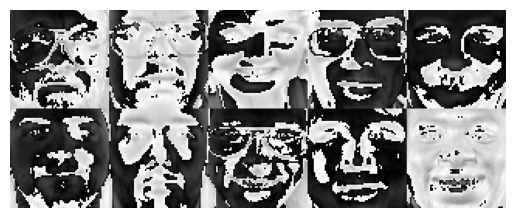

In [19]:
grid_image = get_grid_image(faces_centered_1[:10].reshape(-1,64,64), 2, 5)

plt.imshow(grid_image, cmap='gray')
plt.axis('off')
plt.show()

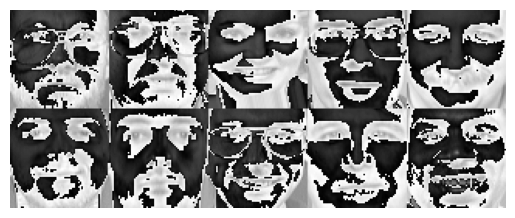

In [20]:
grid_image = get_grid_image(faces_centered_2[:10].reshape(-1,64,64), 2, 5)

plt.imshow(grid_image, cmap='gray')
plt.axis('off')
plt.show()

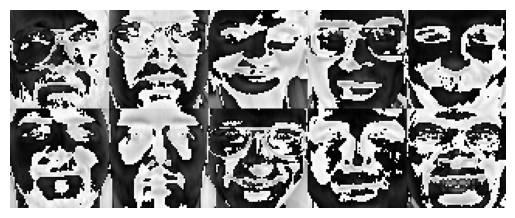

In [21]:
feature_mean = faces.mean(axis=0)
faces_centered = faces - feature_mean
faces_centered = faces_centered - faces_centered.mean(axis=1).reshape(faces_centered.shape[0],-1)

grid_image = get_grid_image(faces_centered[:10].reshape(-1,64,64), 2, 5)

plt.imshow(grid_image, cmap='gray')
plt.axis('off')
plt.show()

## Step 2: Compute Principal Components

In [22]:
def compute_eigenvector(data):
    '''
    Compute eigenvectors
    Do NOT use sklearn, use only numpy
    
    Parameters:
    - data: NXfeature_dim
    
    Returns:
    - eigenvectors (descending order of eigenvalues)
    - eigenvalues (descending order)
    '''
    u, s, vh = np.linalg.svd(data)
    eigenvalues = s**2
    eigenvectors = vh.T

    return eigenvalues, eigenvectors

In [23]:
eigenvalues, eigenvectors = compute_eigenvector(faces_centered)

### Step 2-1: Visualize Top-N Eigenvectors

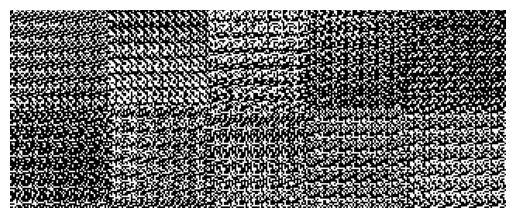

In [24]:
top_N = 10

eigenvectors_topN = eigenvectors[:, :top_N].reshape(-1, 64, 64)

grid_image = get_grid_image(eigenvectors_topN, 2, 5)

plt.imshow(grid_image, cmap='gray')
plt.axis('off')
plt.show()

### Step 2-2: Visualize Lowest-N Eigenvectors

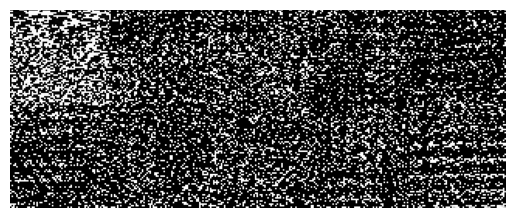

In [25]:
last_N = 10

eigenvectors_lowestN = eigenvectors[:, -last_N:].reshape(-1, 64, 64)

grid_image = get_grid_image(eigenvectors_lowestN, 2, 5)
eigenvectors_lowestN
plt.imshow(grid_image, cmap='gray')
plt.axis('off')
plt.show()

## Step 3: Decompose Image with Eigenvectors and Reconstruct it.

In [26]:
# try with any face image you could use
test_img_path1 = './eigenface_test.png'
test_img_rgb1 = cv2.imread(test_img_path1)
test_img_gray1 = cv2.resize(cv2.cvtColor(test_img_rgb1, cv2.COLOR_BGR2GRAY), (64, 64))

###  Read Test Image and Visualize.

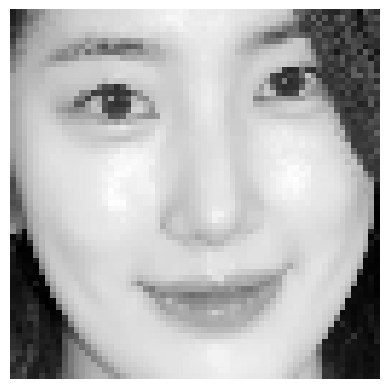

In [27]:
plt.imshow(test_img_gray1, cmap='gray')
plt.axis('off')
plt.show()

### Normalize Image and Visualize.

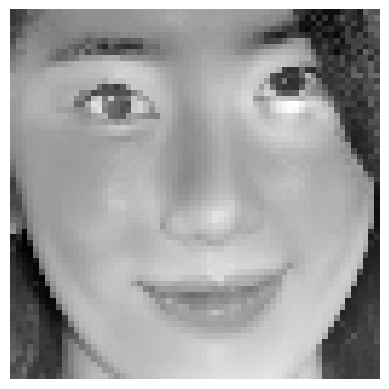

In [28]:
test_feature1 = test_img_gray1.flatten()/255
test_feature1_centered = test_feature1 - feature_mean
test_feature1_centered = test_feature1_centered - test_feature1_centered.mean()

plt.imshow(test_feature1_centered.reshape(64,64), cmap='gray')
plt.axis('off')
plt.show()


### Step 3-1: Make Decompose & Reconstruct Function

In [29]:
def decompose_image_pca(image_flatten, eigenvectors):
    '''
    Decompose image using eigenvectors

    Parameters:
    - image_flatten: 4096 flatten+normalized image
    - eigenvectors: eigenvectors
    
    Returns:
    - pca_coefficients
    - img_reconstructed: 64X64 reconstructed image
    '''
    pca_coefficient = np.dot(image_flatten, eigenvectors)
    img_reconstructed = np.dot(pca_coefficient, eigenvectors.T)

    return pca_coefficient, img_reconstructed

### Draw Reconstructed Image.

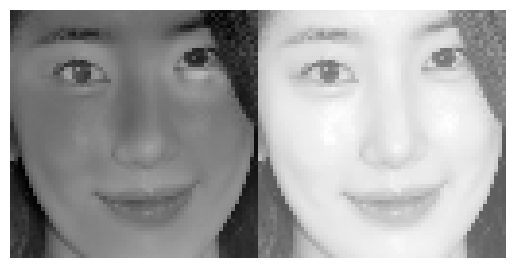

In [30]:
img_pca, img_reconstructed = decompose_image_pca(test_feature1_centered, eigenvectors)
img_reconstructed_unnormalized = img_reconstructed+feature_mean

plt.imshow(np.concatenate((img_reconstructed.reshape(64,64),img_reconstructed_unnormalized.reshape(64,64)), axis=1), cmap='gray')
plt.axis('off')
plt.show()

### Step 3-2: Reconstruct Image with Fewer Eigenvectors

**Hint: use above code as start point**

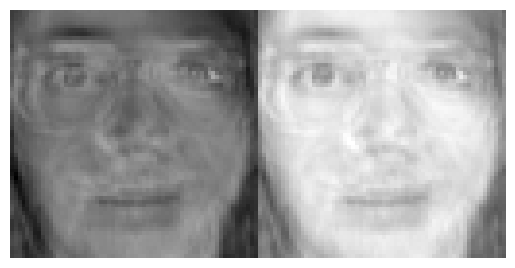

In [31]:
eigen_N = 100

img_pca, img_reconstructed = decompose_image_pca(test_feature1_centered, eigenvectors[:,:eigen_N])
img_reconstructed_unnormalized_eigen100 = img_reconstructed+feature_mean

plt.imshow(np.concatenate((img_reconstructed.reshape(64,64),img_reconstructed_unnormalized_eigen100.reshape(64,64)), axis=1), cmap='gray')
plt.axis('off')
plt.show()

### Test with Different eigen_N

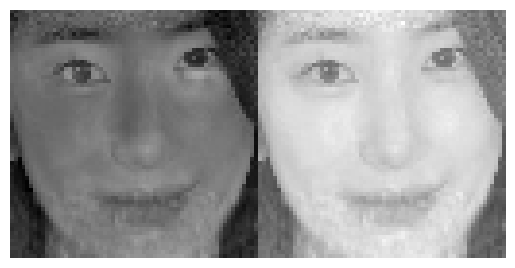

In [32]:
eigen_N = 3000
img_pca, img_reconstructed = decompose_image_pca(test_feature1_centered, eigenvectors[:,:eigen_N])
img_reconstructed_unnormalized_eigen1000 = img_reconstructed+feature_mean

plt.imshow(np.concatenate((img_reconstructed.reshape(64,64),img_reconstructed_unnormalized_eigen1000.reshape(64,64)), axis=1), cmap='gray')
plt.axis('off')
plt.show()

### Step 4: Compute the Difference in Eigen Coefficients between Different People

In [37]:
def compute_cosine_similarity(img_path1, img_path2, feature_mean, eigenvectors):
    '''
    Compare two faces using its eigen coefficients. 

    Parameters:
    - img_path1
    - img_path2
    
    Returns:
    - cosine_similarity 

    # Note: You can add additional parameters to the function if needed.
    '''
    
    img1 = cv2.resize(cv2.cvtColor(cv2.imread(img_path1), cv2.COLOR_BGR2GRAY), (64, 64))
    img2 = cv2.resize(cv2.cvtColor(cv2.imread(img_path2), cv2.COLOR_BGR2GRAY), (64, 64))

    img1_flatten = img1.flatten()/255
    img2_flatten = img2.flatten()/255

    img1_flatten_centered = img1_flatten - feature_mean
    img1_flatten_centered = img1_flatten_centered - img1_flatten_centered.mean()

    img2_flatten_centered = img2_flatten - feature_mean
    img2_flatten_centered = img2_flatten_centered - img2_flatten_centered.mean()

    cosine_similarity = np.dot(img1_flatten_centered, img2_flatten_centered) / (np.linalg.norm(img1_flatten_centered) * np.linalg.norm(img2_flatten_centered))

    return cosine_similarity

In [34]:
img_path_person1_1 = './person1_1.png'
img_path_person1_2 = './person1_2.png'
img_path_person2_1 = './person2_1.png'

### Step 4-1: Read and Visualize All Images

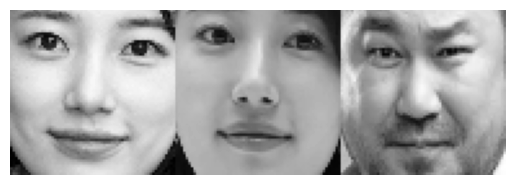

In [35]:
img1_1 = cv2.resize(cv2.cvtColor(cv2.imread(img_path_person1_1), cv2.COLOR_BGR2GRAY), (64, 64))
img1_2 = cv2.resize(cv2.cvtColor(cv2.imread(img_path_person1_2), cv2.COLOR_BGR2GRAY), (64, 64))
img2_1 = cv2.resize(cv2.cvtColor(cv2.imread(img_path_person2_1), cv2.COLOR_BGR2GRAY), (64, 64))

concatenated_imgs = np.concatenate((img1_1, img1_2, img2_1), axis=1)
plt.imshow(concatenated_imgs, cmap='gray')
plt.axis('off')
plt.show()

In [38]:
cos_similarity1 = compute_cosine_similarity(img_path_person1_1, img_path_person1_2, feature_mean, eigenvectors)
cos_similarity2 = compute_cosine_similarity(img_path_person1_1, img_path_person2_1, feature_mean, eigenvectors)
print(f'cosine similarity 1: {cos_similarity1}, 2: {cos_similarity2}')

cosine similarity 1: 0.45971298050541465, 2: 0.040844698552797626
